In [1]:
#SKRYPT PRZEDSTAWIA PRAWDOPODOBIEŃSTWO ROZPOZNAWANIA WZORCA W ZALEŻNOŚCI OD PARAMETRU Q
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
import copy
import random
import chaotic_network as cn
get_ipython().magic('matplotlib inline')
fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

In [2]:
N = 100 #rozmiar sieci
p = 4 # liczba wzorcow w zestawie
it = 2500 #liczba iteracji sieci
trans = 2000 #czas przejsciowy
it2 = 50 #liczba prob, po ktorych bedziemy usredniac
step = 0.01
qs = np.arange(0,1+step,step) #przedzial wartosci parametru q
prob = np.zeros(np.size(qs))

In [3]:
for z in range(it2):
    ii = 0 #iterator po tablicy prawdopodobienstw
    for q in qs:
        ###generowanie losowych wzorcow o danym q###
        pat = np.ones((p,N))
        for i in range(p):
            indices = random.sample(range(N),int(round(q*N)))
            pat[i,indices]=-1
        w = cn.hebb(pat) #generowanie wag
        ###dla sieci z AGS odkomentowac ponizsze 2 linijki
        #L, L_nor = cn.gram_schmidt(pat)
        #w = cn.hebb(L_nor)
        x_0 = np.random.rand(1,N)
        eta_0 = np.zeros((1,N))
        zeta_0 = np.zeros((1,N))
        x = x_0
        eta = eta_0
        zeta = zeta_0
        index = 2
        a = 6.4+pat[index,:] #stymulacja wzorcem
        mu = np.zeros((p,it))
        for i in range(it):
            out = cn.network_step(x, eta, zeta, w, a)
            x = out[0]
            eta = out[1]
            zeta = out[2]
            mu[:,i] = cn.overlap(x,pat,N)
        meanmu = np.mean(mu[:,trans:],1) #liczone srednie przekrycie
        if np.argmax(meanmu) == index: #sprawdzamy czy indeks najwiekszego sredniego przekrycia odpowiada indeksowi wzorca stymulujacego
            if np.size(np.unique(meanmu)) != np.size(np.unique(np.delete(meanmu,index))):
                prob[ii] = prob[ii]+1
        ii=ii+1
prob=prob/it2

/home/norbert/inz_kod/chaotic_network.py:14: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-y/e))


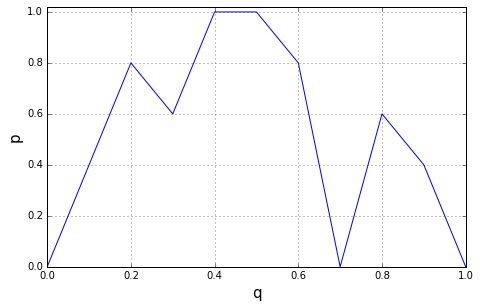

In [4]:
plt.plot(qs,prob)
plt.ylim(ymax=1.02)

In [5]:
meanmu

array([-1., -1., -1., -1.])